In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [53]:
url = "http://localhost:8000/"
option_table = {"page_load_strategy":["normal","eager","none"]}
default_option = ["headless", "--enable-javascript", "--use-gl"]

def edge_test(n=10, backend="wasm", task="vision", arguments={"page_load_strategy":"normal"}, others=default_option):
    option = webdriver.EdgeOptions()
    option.page_load_strategy = arguments["page_load_strategy"]
    for other_options in others:
        option.add_argument(other_options)
    driver = webdriver.Edge(options = option)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n}, "{task}")')
    driver.quit()
    return data
def chrome_test(n=10, backend="wasm", task="vision", arguments={"page_load_strategy":"normal"}, others=default_option):
    option = webdriver.ChromeOptions()
    option.page_load_strategy = arguments["page_load_strategy"]
    for other_options in others:
        option.add_argument(other_options)
    driver = webdriver.Chrome(options = option)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n}, "{task}")')
    driver.quit()
    return data
def firefox_test(n=10, backend="wasm", task="vision", arguments={"page_load_strategy":"normal"}, others=["-headless"]):
    option = webdriver.FirefoxOptions()
    option.page_load_strategy = arguments["page_load_strategy"]
    for other_options in others:
        option.add_argument(other_options)
    driver = webdriver.Firefox(options = option)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n}, "{task}")')
    driver.quit()
    return data

In [68]:
edge_data = {}
for mode in option_table["page_load_strategy"]:
    for i in tqdm(range(10), f"edge test with {mode} mode"):
        try:
            result = edge_test(arguments={"page_load_strategy":mode})
        except:
            break
        if mode not in edge_data:
            edge_data[mode] = []
        edge_data[mode] += result

edge test with none mode:   0%|          | 0/10 [00:03<?, ?it/s]


In [75]:
chrome_data = {}
for mode in option_table["page_load_strategy"]:
    for i in tqdm(range(10), f"chrome test with {mode} mode"):
        try:
            result = chrome_test(arguments={"page_load_strategy":mode})
        except:
            break
        if mode not in chrome_data:
            chrome_data[mode] = []
        chrome_data[mode] += result

chrome test with none mode:   0%|          | 0/10 [00:03<?, ?it/s]


In [76]:
for mode in option_table["page_load_strategy"]:
    for i in tqdm(range(10), f"chrome test with lowend_{mode} mode"):
        try:
            result = chrome_test(arguments={"page_load_strategy":mode}, others=default_option+["--enable-low-end-device-mode"])
        except:
            break
        if f"lowend_{mode}" not in chrome_data:
            chrome_data[f"lowend_{mode}"] = []
        chrome_data[f"lowend_{mode}"] += result


chrome test with lowend_none mode:   0%|          | 0/10 [00:03<?, ?it/s]


In [60]:
firefox_data = {}
for mode in option_table["page_load_strategy"]:
    for i in tqdm(range(10), f"firefox test with {mode} mode"):
        try:
            result = firefox_test(arguments={"page_load_strategy":mode}, others=["-headless"])
        except:
            break
        if mode not in firefox_data:
            firefox_data[mode] = []
        firefox_data[mode] += result

firefox test with none mode:   0%|          | 0/10 [00:04<?, ?it/s]


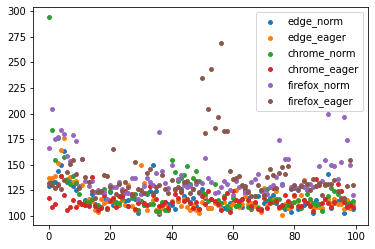

In [77]:
plt.scatter(range(len(edge_data["normal"])), edge_data["normal"], s=15, label="edge_norm")
plt.scatter(range(len(edge_data["eager"])), edge_data["eager"], s=15, label="edge_eager")
plt.scatter(range(len(chrome_data["normal"])), chrome_data["normal"], s=15, label="chrome_norm")
plt.scatter(range(len(chrome_data["eager"])), chrome_data["eager"], s=15, label="chrome_eager")
plt.scatter(range(len(firefox_data["normal"])), firefox_data["normal"], s=15, label="firefox_norm")
plt.scatter(range(len(firefox_data["eager"])), firefox_data["eager"], s=15, label="firefox_eager")
plt.legend()

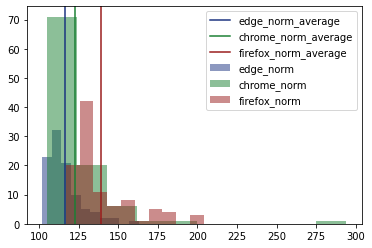

In [78]:
plt.hist(edge_data["normal"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_norm")
# plt.hist(edge_data["eager"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_eager")
plt.hist(chrome_data["normal"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_norm")
# plt.hist(chrome_data["eager"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_eager")
plt.hist(firefox_data["normal"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_norm")
# plt.hist(firefox_data["eager"], alpha=.5, bins=10, color=(0.5, 0.2, 0.1), label="firefox_eager")
plt.axvline(sum(edge_data["normal"])/len(edge_data["normal"]), c=(0.1, 0.2, 0.5), label="edge_norm_average")
# plt.axvline(sum(edge_data["eager"])/len(edge_data["eager"]), c=(0.1, 0.2, 0.5), label="edge_eager_average")
plt.axvline(sum(chrome_data["normal"])/len(chrome_data["normal"]), c=(0.1, 0.5, 0.2), label="chrome_norm_average")
# plt.axvline(sum(chrome_data["eager"])/len(chrome_data["eager"]), c="orange", label="chrome_eager_average")
plt.axvline(sum(firefox_data["normal"])/len(firefox_data["normal"]), c=(0.6, 0.1, 0.1), label="firefox_norm_average")
# plt.axvline(sum(firefox_data["eager"])/len(firefox_data["eager"]), c="g", label="firefox_eager_average")
plt.legend()

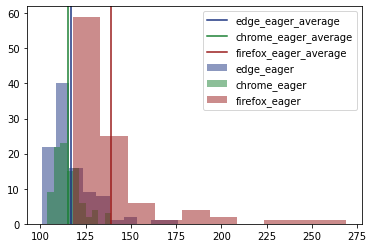

In [79]:
# plt.hist(edge_data["normal"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_norm")
plt.hist(edge_data["eager"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_eager")
# plt.hist(chrome_data["normal"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_norm")
plt.hist(chrome_data["eager"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_eager")
# plt.hist(firefox_data["normal"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_norm")
plt.hist(firefox_data["eager"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_eager")
# plt.axvline(sum(edge_data["normal"])/len(edge_data["normal"]), c=(0.1, 0.2, 0.5), label="edge_norm_average")
plt.axvline(sum(edge_data["eager"])/len(edge_data["eager"]), c=(0.1, 0.2, 0.5), label="edge_eager_average")
# plt.axvline(sum(chrome_data["normal"])/len(chrome_data["normal"]), c=(0.1, 0.5, 0.2), label="chrome_norm_average")
plt.axvline(sum(chrome_data["eager"])/len(chrome_data["eager"]), c=(0.1, 0.5, 0.2), label="chrome_eager_average")
# plt.axvline(sum(firefox_data["normal"])/len(firefox_data["normal"]), c=(0.6, 0.1, 0.1), label="firefox_norm_average")
plt.axvline(sum(firefox_data["eager"])/len(firefox_data["eager"]), c=(0.6, 0.1, 0.1), label="firefox_eager_average")
plt.legend()

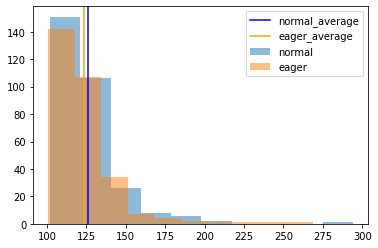

In [80]:
plt.hist(edge_data["normal"]+chrome_data["normal"]+firefox_data["normal"], alpha=.5, bins=10, label="normal")
plt.hist(edge_data["eager"]+chrome_data["eager"]+firefox_data["eager"], alpha=.5, bins=10, label="eager")
plt.axvline(sum(edge_data["normal"]+chrome_data["normal"]+firefox_data["normal"])/
            len(edge_data["normal"]+chrome_data["normal"]+firefox_data["normal"]), c='b', label="normal_average")
plt.axvline(sum(edge_data["eager"]+chrome_data["eager"]+firefox_data["eager"])/
            len(edge_data["eager"]+chrome_data["eager"]+firefox_data["eager"]), c='orange', label="eager_average")
plt.legend()

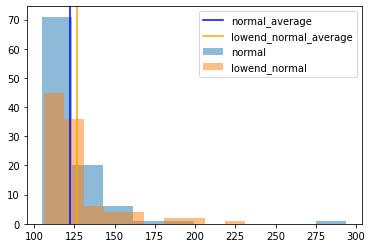

In [81]:
plt.hist(chrome_data["normal"], alpha=.5, bins=10, label="normal")
plt.hist(chrome_data["lowend_normal"], alpha=.5, bins=10, label="lowend_normal")
# plt.hist(chrome_data["eager"], alpha=.5, bins=10, label="eager")
# plt.hist(edge_data["eager"]+chrome_data["eager"]+firefox_data["eager"], alpha=.5, bins=10, label="eager")
plt.axvline(sum(chrome_data["normal"])/len(chrome_data["normal"]), c='b', label="normal_average")
plt.axvline(sum(chrome_data["lowend_normal"])/len(chrome_data["lowend_normal"]), c='orange', label="lowend_normal_average")
plt.legend()

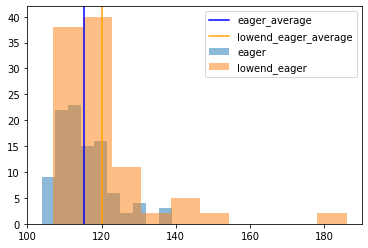

In [82]:
plt.hist(chrome_data["eager"], alpha=.5, bins=10, label="eager")
plt.hist(chrome_data["lowend_eager"], alpha=.5, bins=10, label="lowend_eager")
# plt.hist(chrome_data["eager"], alpha=.5, bins=10, label="eager")
# plt.hist(edge_data["eager"]+chrome_data["eager"]+firefox_data["eager"], alpha=.5, bins=10, label="eager")
plt.axvline(sum(chrome_data["eager"])/len(chrome_data["eager"]), c='b', label="eager_average")
plt.axvline(sum(chrome_data["lowend_eager"])/len(chrome_data["lowend_eager"]), c='orange', label="lowend_eager_average")
plt.legend()